# Nuages de mots

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "rue", "rue", "dem", "rossel", "très", "bon",
       "ans", "place", "heures", "ecr", "avenue", "tél", "bonne", "cond", "brux", "vend",
       "midi", "belle", "adr", "toute", "etc", "bons", "grande", "grand", "demande",
       "nord", "jour", "jours", "ecrire", "mois", "soir", "cherche"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [16]:
# Choisir une année
year = 1930

In [17]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [6]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [7]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [8]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'f LE SOIR ^■Jtl S.** UE IXe CHAMPIONNAT DE LA CORPORATION DES MARCHANDS DE JOURNAUX Victoire de l’Individuel Haas. La Pédale du « Soir » enlève définitivement la coupe de l‘« Etoile Belge » Co dimanch'

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [10]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"f LE SOIR ^■Jtl S.** UE IXe CHAMPIONNAT DE LA CORPORATION DES MARCHANDS DE JOURNAUX Victoire de l’Individuel Haas. La Pédale du « Soir » enlève définitivement la coupe de l‘« Etoile Belge » Co dimanche matin s'est dls-juté. pour la neuvième fols, le championnat qu'organise la Corpo. ration des marchands de Journaux. Portant sur le dos une charge de 10 kilos de Journaux, les porteurs avalent à parcourir environ 75 kllom., au départ de Woîuwe, en allant par Nivelles, Genappe et retour. La signalis"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [11]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1930_clean.txt!'

In [13]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'JTL IXE CHAMPIONNAT CORPORATION MARCHANDS JOURNAUX VICTOIRE INDIVIDUEL HAAS PÉDALE ENLÈVE DÉFINITIVEMENT COUPE ETOILE BELGE DIMANCHE MATIN DLS JUTÉ NEUVIÈME FOLS CHAMPIONNAT ORGANISE CORPO RATION MARCHANDS JOURNAUX PORTANT DOS CHARGE KILOS JOURNAUX PORTEURS AVALENT PARCOURIR ENVIRON KLLOM DÉPART WOÎUWE ALLANT NIVELLES GENAPPE RETOUR SIGNALISATION ASSURÉE FAÇON IMPECCABLE MEMBRES ETTERBEEK SPORTIF TANDIS CROIX ROUGE GIHES DIRIGÉE DOCTEUR GILSON AIDES MMES BRIGOTTE DEGNELOS OPSTAL KEYSER SCHACKSYS'

## Nuage de mots

### Afficher les termes les plus fréquents


In [14]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('BRUXELLES', 1558), ('PRIX', 1270), ('MAISON', 987), ('AGENCE', 868), ('LOUER', 745), ('VENDRE', 701), ('FRANCS', 677), ('ÉTAT', 517), ('ANVERS', 418), ('JEUNE', 405), ('COURS', 353), ('EAU', 348), ('BELGIQUE', 339), ('PRÈS', 335), ('FILLE', 333), ('FEMME', 332), ('LIBRE', 330), ('VENTE', 324), ('MOD', 323), ('SALLE', 315), ('GAZ', 314), ('CONF', 313), ('BELGE', 312), ('MATIN', 312), ('SAINT', 310), ('COMMERCE', 301), ('COUR', 301), ('PARIS', 297), ('PEU', 297), ('SUITE', 297)]


### Créer, stocker et afficher le nuage de mots

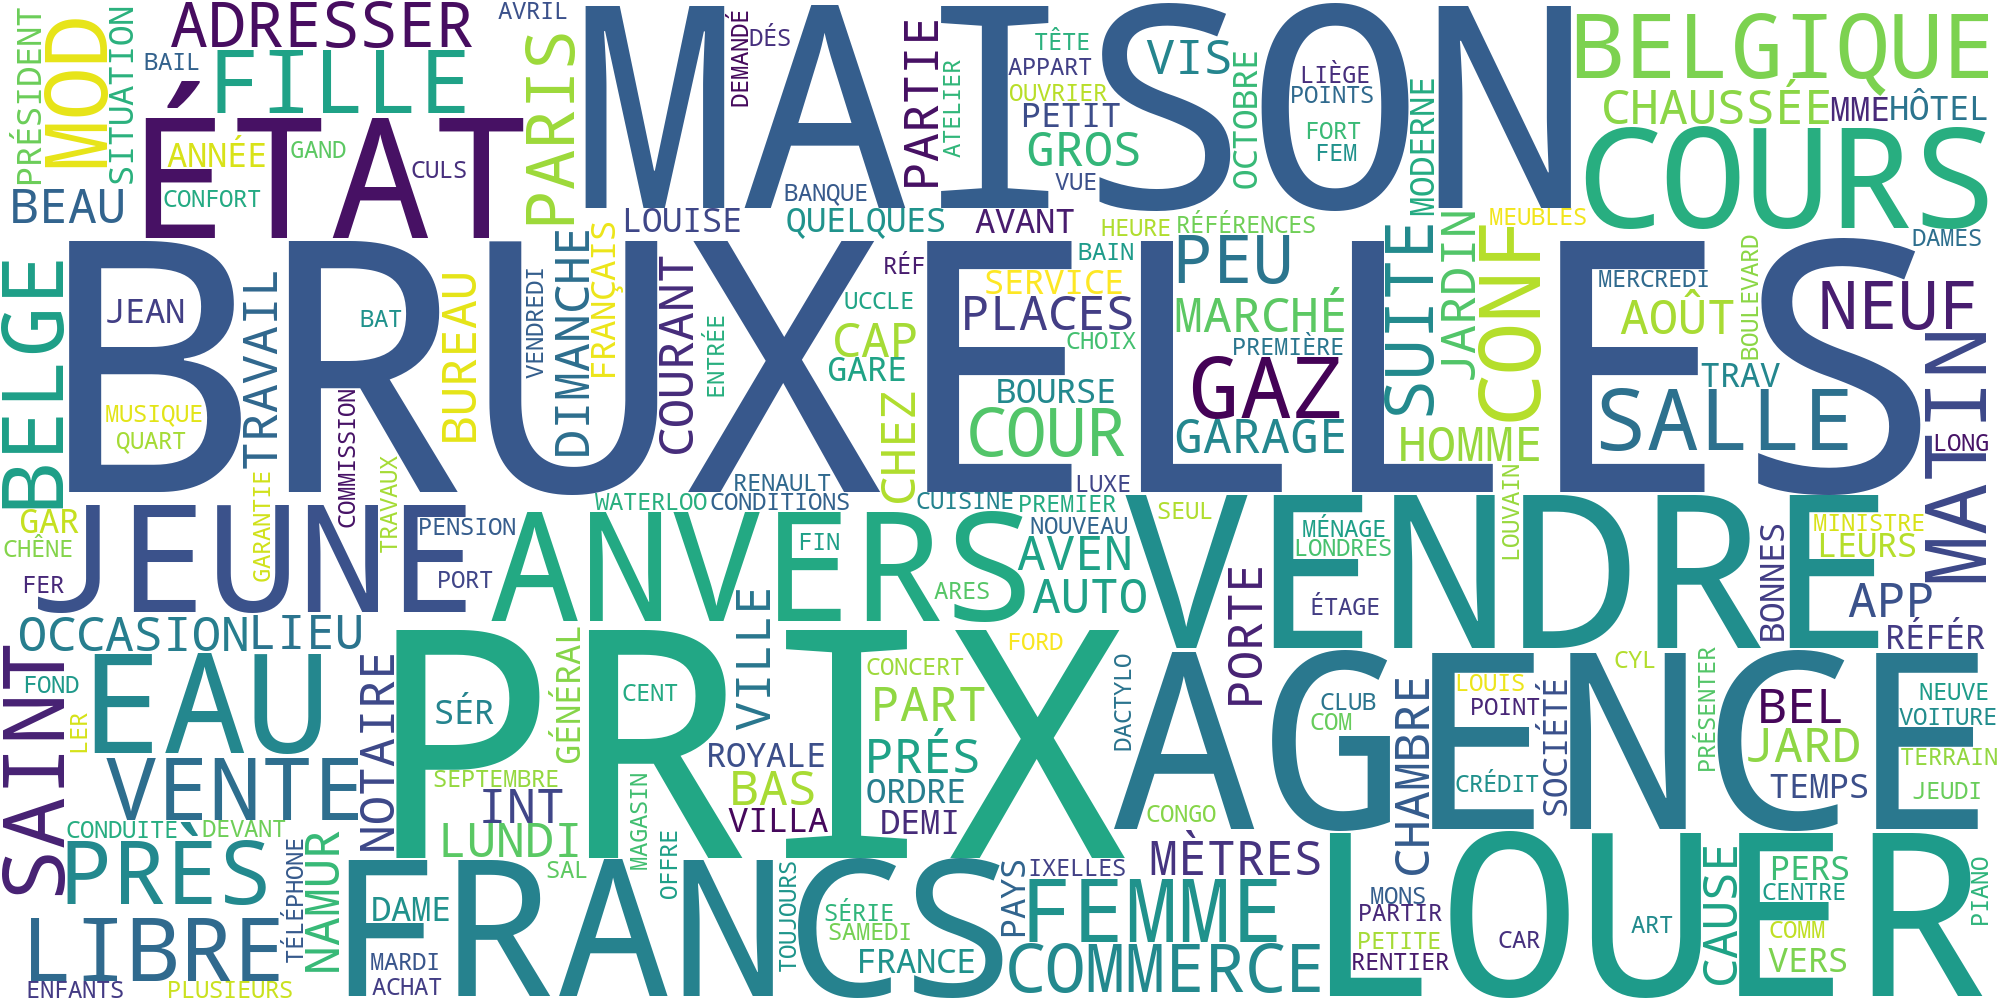

In [15]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))